In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime


In [4]:
df_Tes=pdr.get_data_yahoo('TSLA')

In [5]:
df_Tes

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,59.799999,56.916000,57.380001,59.703999,69443000.0,59.703999
2017-04-04,60.962002,58.905998,59.377998,60.740002,50673000.0,60.740002
2017-04-05,60.976002,58.840000,60.408001,59.000000,39404500.0,59.000000
2017-04-06,60.388000,58.820000,59.375999,59.740002,27603000.0,59.740002
2017-04-07,60.537998,59.430000,59.500000,60.507999,22898000.0,60.507999
...,...,...,...,...,...,...
2022-03-29,1114.770020,1073.109985,1107.989990,1099.569946,24538300.0,1099.569946
2022-03-30,1113.949951,1084.000000,1091.170044,1093.989990,19955000.0,1093.989990
2022-03-31,1103.140015,1076.640015,1094.569946,1077.599976,16330900.0,1077.599976


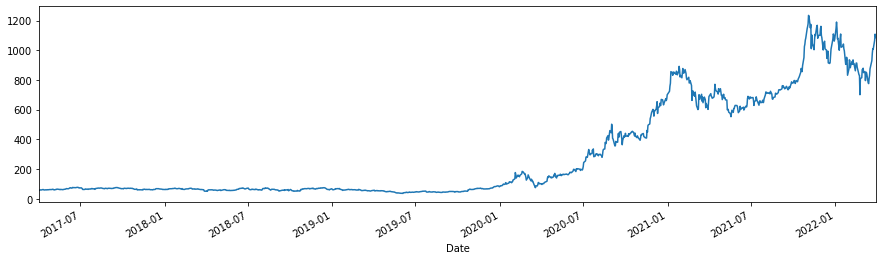

In [8]:
#Smoothening
df_Tes['Open'].plot(figsize=(15,4))

In [10]:
#In rolling there is thing called window and period , Open data 12,34,45,456,33,3
#Suppose min period =1 when windows size =5
#Min period =1 5 than all the rows will be having 5 rows as NAN
#We have to use aggregator function to calculate mean value

df_Tes['Open:10daysrolling']=df_Tes['Open'].rolling(window=10,min_periods=1).mean()

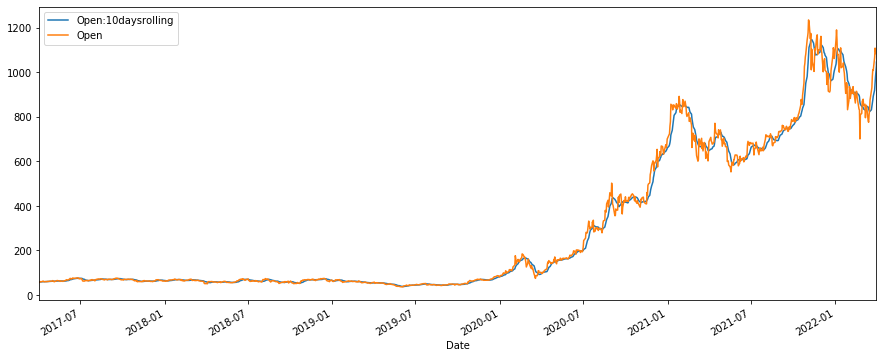

In [13]:
df_Tes[['Open:10daysrolling','Open']].plot(figsize=(15,6))

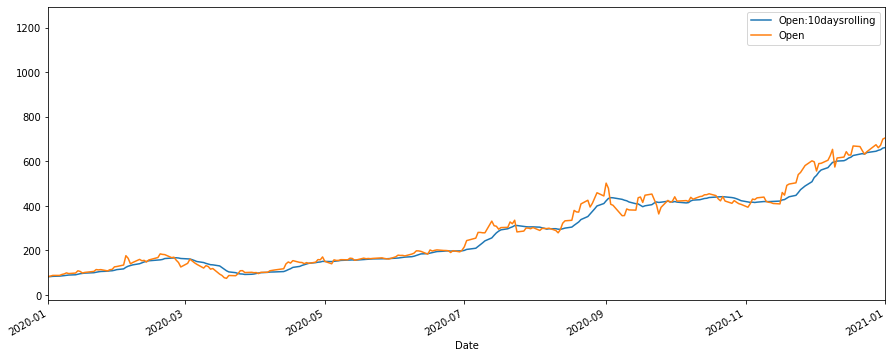

In [26]:
#Lets focus on the first year data

df_Tes[['Open:10daysrolling','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [27]:
#Similaryl we can compare for 30 and 50days rolling graph  and check smoothening
df_Tes['Open:30daysrolling']=df_Tes['Open'].rolling(window=30,min_periods=1).mean()
df_Tes['Open:50daysrolling']=df_Tes['Open'].rolling(window=50,min_periods=1).mean()

In [28]:
df_Tes

,High,Low,Open,Close,Volume,Adj Close,Open:10daysrolling,Open:30daysrolling,Open:50daysrolling
Date,,,,,,,,,
2017-04-03,59.799999,56.916000,57.380001,59.703999,69443000.0,59.703999,57.380001,57.380001,57.380001
2017-04-04,60.962002,58.905998,59.377998,60.740002,50673000.0,60.740002,58.379000,58.379000,58.379000
2017-04-05,60.976002,58.840000,60.408001,59.000000,39404500.0,59.000000,59.055333,59.055333,59.055333
2017-04-06,60.388000,58.820000,59.375999,59.740002,27603000.0,59.740002,59.135500,59.135500,59.135500
2017-04-07,60.537998,59.430000,59.500000,60.507999,22898000.0,60.507999,59.208400,59.208400,59.208400
...,...,...,...,...,...,...,...,...,...
2022-03-29,1114.770020,1073.109985,1107.989990,1099.569946,24538300.0,1099.569946,953.021991,878.041331,898.222998
2022-03-30,1113.949951,1084.000000,1091.170044,1093.989990,19955000.0,1093.989990,981.238995,884.413666,899.514199
2022-03-31,1103.140015,1076.640015,1094.569946,1077.599976,16330900.0,1077.599976,1007.596991,890.430998,900.571399


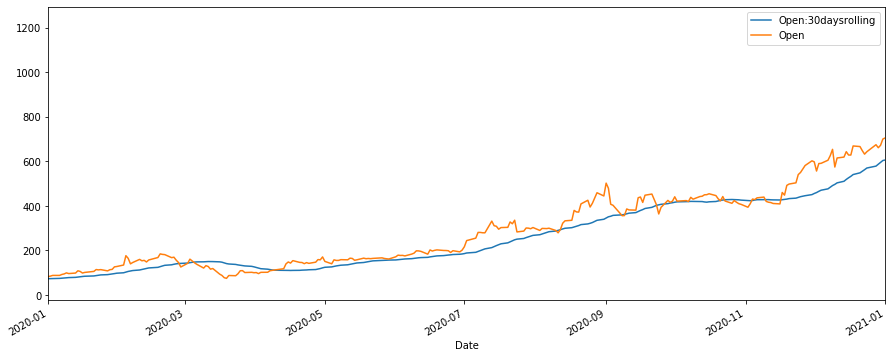

In [29]:
df_Tes[['Open:30daysrolling','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

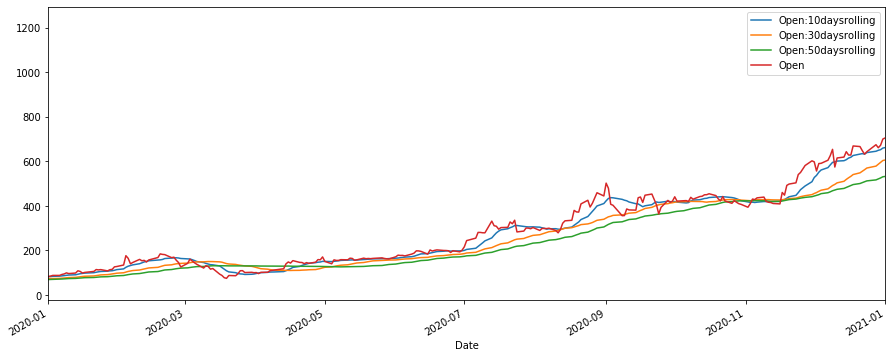

In [31]:
df_Tes[['Open:10daysrolling','Open:30daysrolling','Open:50daysrolling','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

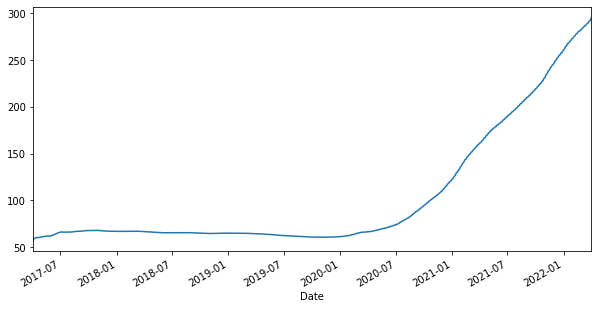

In [32]:
#Expanding- minimum period by default is 1, and this is CMA of Open and it will calculate from the first index

df_Tes['Open'].expanding().mean().plot(figsize=(10,5))

In [33]:
#Exponential  moving average, alpha is just hyperparmaeter for somoothening parameters, 
df_Tes['ewm_0.1']=df_Tes['Open'].ewm(alpha=0.1, adjust=False).mean()

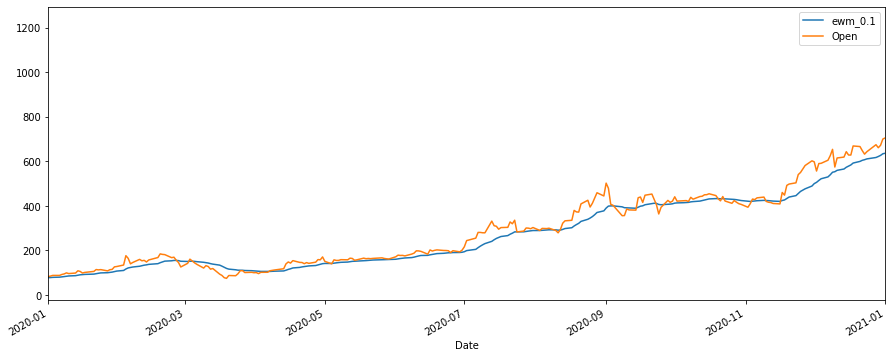

In [34]:
df_Tes[['ewm_0.1','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))
#without any lag we cansee the entire exponential moving average which was better than simple moving average
#Smoothenning can be more by using different parameters and chaning alpha value to 0.3

In [35]:
df_Tes['ewm_0.3']=df_Tes['Open'].ewm(alpha=0.3, adjust=False).mean()

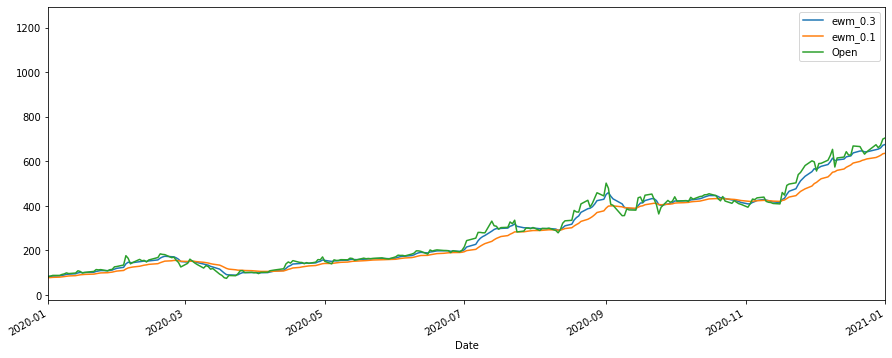

In [36]:
df_Tes[['ewm_0.3','ewm_0.1','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [37]:
df_Tes['ewma_0.5']=df_Tes['Open'].ewm(span=5).mean()

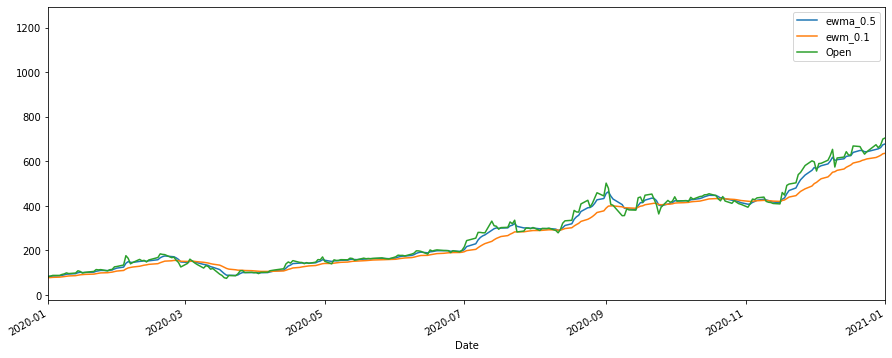

In [38]:
df_Tes[['ewma_0.5','ewm_0.1','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))